# Financial Report

### Authomatic financial report using Python

#### What we gonna do?:
<BR>

- Pick the data
- Treat the data
- Calculate and generate the graphics
- generate a report in PDF
- Send by e-mail
<BR>

#### Information will be collected from:

* Ibovespa
* S&500
* DI contracts (Brazilian interbank deposits rate)
* Dollar
* Inflation (brazil)
* Selic (Brazilian interest rate)

<br>

Step by step:

   - Get Ibovespa and S&P500 data from Yahoo Finance
   - Calculate return in the year, return in the month, 12m volatility, month-to-month return and plot the graphics.
   - Get DI data on the B3 (brazilian stock exchange) website
   - Get dollar, inflation and selic data from the brazilian central bank website
   - Create a custom PDF
   - Send the report by e-mail


#### obs: advisable to run the program in the morning

In [101]:
#installing libraries that will be used

#!pip install html5lib
#!pip install webdriver-manager
#!pip install python-bcb
#!pip install pandas-datareader
#!pip install mplfinance
#!pip install selenium
#!pip install FPDF
#!pip install mplcyberpunk
#!pip install python-dotenv
#!pip install pywin32

## Importing libraries

In [102]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import datetime
from datetime import timedelta
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import mplcyberpunk
import time
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from webdriver_manager.firefox import GeckoDriverManager
import requests
from bcb import currency
from bcb import sgs
from fpdf import FPDF
from matplotlib.dates import date2num
import warnings
warnings.filterwarnings('ignore')

# Picking Ibovespa and S&P500 data

In [103]:
#getting data from yahoo finance 
indices = ['^BVSP', '^GSPC']

hoje = datetime.now()
um_ano_atras = hoje - timedelta(days = 366)

dados_mercado = pdr.get_data_yahoo(indices, start = um_ano_atras, end = hoje)

display(dados_mercado)

Attributes  Adj Close                   Close                        High  \
Symbols         ^BVSP        ^GSPC      ^BVSP        ^GSPC          ^BVSP   
Date                                                                        
2021-11-17  102945.00  4688.669922  102945.00  4688.669922  105535.000000   
2021-11-18  102524.00  4704.540039  102524.00  4704.540039  103757.000000   
2021-11-19  103035.00  4697.959961  103035.00  4697.959961  103975.000000   
2021-11-22  102122.00  4682.939941  102122.00  4682.939941  104613.000000   
2021-11-23  103663.00  4690.700195  103663.00  4690.700195  103692.000000   
...               ...          ...        ...          ...            ...   
2022-11-14  113161.00  3957.250000  113161.00  3957.250000  114322.000000   
2022-11-15        NaN  3991.729980        NaN  3991.729980            NaN   
2022-11-16  110243.00  3958.790039  110243.00  3958.790039  113473.000000   
2022-11-17  108918.00  3946.560059  108918.00  3946.560059  110242.000000   
2022-11-18  108665.75  3942.270020  108665.75  3942.270020  111584.859375   

Attributes                         Low                        Open  \
Symbols           ^GSPC          ^BVSP        ^GSPC          ^BVSP   
Date                                                                 
2021-11-17  4701.500000  102551.000000  4684.410156  104405.000000   
2021-11-18  4708.799805  102014.000000  4672.779785  102948.000000   
2021-11-19  4717.750000  102143.000000  4694.220215  102426.000000   
2021-11-22  4743.830078  102122.000000  4682.169922  103036.000000   
2021-11-23  4699.390137  101736.000000  4652.660156  102124.000000   
...                 ...            ...          ...            ...   
2022-11-14  4008.969971  111930.000000  3956.399902  112256.000000   
2022-11-15  4028.840088            NaN  3953.169922            NaN   
2022-11-16  3983.090088  109512.000000  3954.340088  113166.000000   
2022-11-17  3954.330078  107245.000000  3906.540039  110241.000000   
2022-11-18  3979.889893  108569.601562  3935.979980  109706.429688   

Attributes                   Volume                
Symbols           ^GSPC       ^BVSP         ^GSPC  
Date                                               
2021-11-17  4701.500000  12832200.0  3.969070e+09  
2021-11-18  4700.720215  10905700.0  4.226410e+09  
2021-11-19  4708.439941  11101500.0  4.253180e+09  
2021-11-22  4712.000000  10410000.0  4.441100e+09  
2021-11-23  4678.479980  13032400.0  4.277590e+09  
...                 ...         ...           ...  
2022-11-14  3977.969971  15080400.0  4.561930e+09  
2022-11-15  4006.409912         NaN  5.015310e+09  
2022-11-16  3976.820068  18351000.0  4.165320e+09  
2022-11-17  3919.260010  23119600.0  4.051780e+09  
2022-11-18  3966.389893         0.0  9.115880e+08  

[261 rows x 12 columns]

In [104]:
#taking day closing of the market
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ["Ibov", "S&P500"]
dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,Ibov,S&P500
Date,,
2021-11-17,102945.00,4688.669922
2021-11-18,102524.00,4704.540039
2021-11-19,103035.00,4697.959961
2021-11-22,102122.00,4682.939941
2021-11-23,103663.00,4690.700195
...,...,...
2022-11-11,111820.00,3992.929932
2022-11-14,113161.00,3957.250000
2022-11-16,110243.00,3958.790039


In [105]:
#taking monthly and annual closing of the market to calculate returns

dados_anuais = dados_fechamento.resample("Y").last()

display(dados_anuais)

dados_mensais = dados_fechamento.resample("M").last()

dados_mensais

,Ibov,S&P500
Date,,
2021-12-31,104822.00,4778.72998
2022-12-31,108665.75,3942.27002


,Ibov,S&P500
Date,,
2021-11-30,101915.00,4567.000000
2021-12-31,104822.00,4778.729980
2022-01-31,112388.00,4515.549805
2022-02-28,113142.00,4384.649902
2022-03-31,119999.00,4530.410156
2022-04-30,107876.00,4131.930176
2022-05-31,111351.00,4132.149902
2022-06-30,98542.00,3785.379883
2022-07-31,103165.00,4130.290039


In [106]:
#calculating returns

retorno_diario = dados_fechamento.pct_change().dropna()

display(retorno_diario)

retorno_mes_a_mes = dados_mensais.pct_change().dropna()

retorno_mes_a_mes = retorno_mes_a_mes.iloc[1: , :]

display(retorno_mes_a_mes)

retorno_no_ano = dados_anuais.pct_change().dropna()

display(retorno_no_ano)

,Ibov,S&P500
Date,,
2021-11-18,-0.004090,0.003385
2021-11-19,0.004984,-0.001399
2021-11-22,-0.008861,-0.003197
2021-11-23,0.015090,0.001657
2021-11-24,0.008209,0.002294
...,...,...
2022-11-11,0.018629,0.009241
2022-11-14,0.011992,-0.008936
2022-11-16,-0.025786,0.000389


,Ibov,S&P500
Date,,
2022-01-31,0.072180,-0.055073
2022-02-28,0.006709,-0.028989
2022-03-31,0.060605,0.033243
2022-04-30,-0.101026,-0.087957
2022-05-31,0.032213,0.000053
2022-06-30,-0.115033,-0.083920
2022-07-31,0.046914,0.091116
2022-08-31,0.061629,-0.042440
2022-09-30,0.004693,-0.093396


,Ibov,S&P500
Date,,
2022-12-31,0.036669,-0.175038


In [107]:
#testing day closing market

fechamento_de_dia = retorno_diario.iloc[-1, :]

display(fechamento_de_dia)

Ibov     -0.002316
S&P500   -0.001087
Name: 2022-11-18 00:00:00, dtype: float64

In [108]:
#ibovespa and S&P500 volatility

volatilidade_12m_ibov = retorno_diario['Ibov'].std() * np.sqrt(252)
volatilidade_12m_sp = retorno_diario['S&P500'].std() * np.sqrt(252)

print(volatilidade_12m_ibov)
print(volatilidade_12m_sp)

0.2076068623874488
0.24510221954011477


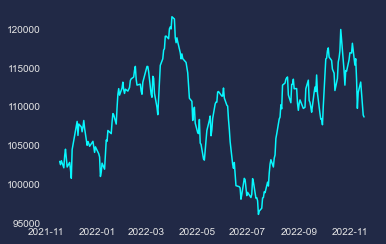

In [109]:
#plotting IBOV closing chart

fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(dados_fechamento.index, dados_fechamento['Ibov'])
ax.grid(False)
plt.savefig('ibov.png', dpi = 300)

plt.show()

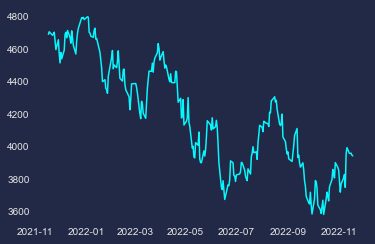

In [110]:
#plotting S&P500 closing chart

fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(dados_fechamento.index, dados_fechamento['S&P500'])
ax.grid(False)
plt.savefig('sp.png', dpi = 300)

plt.show()

# DI data

https://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?pagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data=07/10/2019&Mercadoria=DI1

In [111]:
dados_fechamento

,Ibov,S&P500
Date,,
2021-11-17,102945.00,4688.669922
2021-11-18,102524.00,4704.540039
2021-11-19,103035.00,4697.959961
2021-11-22,102122.00,4682.939941
2021-11-23,103663.00,4690.700195
...,...,...
2022-11-11,111820.00,3992.929932
2022-11-14,113161.00,3957.250000
2022-11-16,110243.00,3958.790039


In [112]:
#picking working days

data_inicial = dados_fechamento.index[0]

if datetime.now().hour < 10:

    data_final = dados_fechamento.index[-1]
    
else:
    
    data_final = dados_fechamento.index[-2]
    

print(data_inicial)

data_inicial = data_inicial.strftime("%d/%m/%Y")
data_final = data_final.strftime("%d/%m/%Y")

print(data_inicial)

2021-11-17 00:00:00
17/11/2021


In [113]:
url_mais_att = f'''http://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?
pagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data={data_final}
&Mercadoria=DI1'''

url_mais_antiga = f'''http://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?
pagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data={data_inicial}
&Mercadoria=DI1'''

url_mais_antiga

'http://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?\npagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data=17/11/2021\n&Mercadoria=DI1'

In [114]:
def pegando_dados_di(url):
    
    driver = webdriver.Firefox(service=Service(GeckoDriverManager().install()))
    
    sem_conexao = True
    
    while sem_conexao:
        try:
            driver.get(url)
            sem_conexao = False
        except:
            pass
            

    local_tabela = '''
    //div[@id = "containerPop"]//div[@id = "pageContent"]//form//table//tbody//tr[3]//td[3]//table
    '''

    local_indice = '''
    //div[@id = "containerPop"]//div[@id = "pageContent"]//form//table//tbody//tr[3]//td[1]//table
    '''

    elemento = driver.find_element("xpath", local_tabela)

    elemento_indice = driver.find_element("xpath", local_indice)

    html_tabela = elemento.get_attribute('outerHTML')
    html_indice = elemento_indice.get_attribute('outerHTML')

    driver.quit()

    tabela = pd.read_html(html_tabela)[0]
    indice = pd.read_html(html_indice)[0]

    return tabela, indice

In [115]:
di_mais_recente, indice_di_mais_recente = pegando_dados_di(url = url_mais_att)

di_mais_antigo, indice_di_mais_antigo = pegando_dados_di(url = url_mais_antiga)

[WDM] - Downloading: 19.0kB [00:00, 3.26MB/s]                                                                          


In [116]:
display(di_mais_recente)
display(indice_di_mais_recente)

,0,1,2,3,4,5,6,7,8,9,10
0,AJUSTE ANTER. (3),AJUSTE CORRIG. (4),PREÇO ABERT.,PREÇO MÍN.,PREÇO MÁX.,PREÇO MÉD.,ÚLT. PREÇO,AJUSTE,VAR. PTOS.,ÚLT. OF. COMPRA,ÚLT. OF. VENDA
1,"99.492,69","99.492,69",13674,13656,13678,13675,13672,"99.492,56","0,13-",13672,13676
2,"98.381,51","98.381,51",13712,13688,13766,13732,13696,"98.381,51",000,13688,13696
3,"97.275,59","97.275,59",13750,13710,13800,13773,13710,"97.276,69","1,10+",13710,13726
4,"96.373,37","96.373,37",13880,13795,13895,13845,13800,"96.359,37","14,00-",13800,13810
5,"95.228,63","95.228,63",13915,13840,13980,13916,13845,"95.208,80","19,83-",13840,13845
6,"94.328,22","94.328,22",13990,13990,14035,14007,13990,"94.295,66","32,56-",13900,13950
7,"93.222,82","93.222,82",14230,14040,14230,14051,14040,"93.203,80","19,02-",0000,14125
8,"92.195,24","92.195,24",14190,14010,14255,14144,14020,"92.158,94","36,30-",14005,14020
9,"91.189,55","91.189,55",14220,14105,14220,14188,14150,"91.150,90","38,65-",14010,14080


,0
0,VENCTO
1,Z22
2,F23
3,G23
4,H23
5,J23
6,K23
7,M23
8,N23
9,Q23


In [117]:
def tratando_dados_di(df_dados, indice):
    
    
    df_dados.columns = df_dados.loc[0]

    df_dados = df_dados['ÚLT. PREÇO']

    df_dados = df_dados.drop(0, axis = 0)

    indice.columns = indice.loc[0]

    indice_di = indice['VENCTO']

    indice = indice.drop(0, axis = 0)
    
    df_dados.index = indice['VENCTO']
    
    print(df_dados)
    
    df_dados = df_dados.astype(int)

    df_dados = df_dados[df_dados != 0]

    df_dados = df_dados/1000
    
    print(df_dados)

    return df_dados

In [118]:
dados_di_recente_tratado = tratando_dados_di(di_mais_recente, indice_di_mais_recente)

dados_di_antigo_tratado = tratando_dados_di(di_mais_antigo, indice_di_mais_antigo)

VENCTO
Z22    13672
F23    13696
G23    13710
H23    13800
J23    13845
K23    13990
M23    14040
N23    14020
Q23    14150
U23    14110
V23    14065
X23    14060
F24    14030
J24    13955
N24    13760
V24    13575
F25    13405
J25    13375
N25    13290
V25    13220
F26    13205
J26    13395
N26    13205
V26    13380
F27    13130
J27     0000
N27     0000
V27    13100
F28    13090
F29    13130
F30    13140
F31    13130
F32    13090
F33    13110
F34     0000
F35     0000
F36     0000
F37     0000
Name: ÚLT. PREÇO, dtype: object
VENCTO
Z22    13.672
F23    13.696
G23    13.710
H23    13.800
J23    13.845
K23    13.990
M23    14.040
N23    14.020
Q23    14.150
U23    14.110
V23    14.065
X23    14.060
F24    14.030
J24    13.955
N24    13.760
V24    13.575
F25    13.405
J25    13.375
N25    13.290
V25    13.220
F26    13.205
J26    13.395
N26    13.205
V26    13.380
F27    13.130
V27    13.100
F28    13.090
F29    13.130
F30    13.140
F31    13.130
F32    13.090
F33    13.110
Name: ÚLT. P

In [119]:
dados_di_antigo_tratado

VENCTO
Z21     7.668
F22     8.528
G22     8.862
H22     9.385
J22    10.015
K22    10.505
M22    10.940
N22    11.175
Q22    11.405
U22    11.610
V22    11.760
X22    11.865
Z22    11.915
F23    12.020
J23    12.140
N23    12.160
V23    12.090
F24    12.035
J24    12.000
N24    11.990
V24    11.990
F25    11.950
J25    11.940
N25    11.890
V25    11.890
F26    11.860
N26    11.850
V26    11.810
F27    11.880
F28    11.850
F29    11.850
F31    11.770
F33    11.730
Name: ÚLT. PREÇO, dtype: float64

In [120]:
legenda = pd.Series(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                    index = ['F', 'G', 'H', 'J', 'K', 'M', 'N', 'Q', 'U', 'V', 'X', 'Z'])

legenda
legenda["F"]

'Jan'

In [121]:
def transformando_codigo_em_data(df):

    lista_datas = []

    for indice in df.index:

        letra = indice[0]
        ano = indice[1:3]

        mes = legenda[letra]

        data = f"{mes}-{ano}"

        data = datetime.strptime(data, "%b-%y")

        lista_datas.append(data)
        

    df.index = lista_datas  
    
    return df

In [122]:
dados_di_recente_tratado = transformando_codigo_em_data(dados_di_recente_tratado)
dados_di_antigo_tratado = transformando_codigo_em_data(dados_di_antigo_tratado)

dados_di_recente_tratado

2022-12-01    13.672
2023-01-01    13.696
2023-02-01    13.710
2023-03-01    13.800
2023-04-01    13.845
2023-05-01    13.990
2023-06-01    14.040
2023-07-01    14.020
2023-08-01    14.150
2023-09-01    14.110
2023-10-01    14.065
2023-11-01    14.060
2024-01-01    14.030
2024-04-01    13.955
2024-07-01    13.760
2024-10-01    13.575
2025-01-01    13.405
2025-04-01    13.375
2025-07-01    13.290
2025-10-01    13.220
2026-01-01    13.205
2026-04-01    13.395
2026-07-01    13.205
2026-10-01    13.380
2027-01-01    13.130
2027-10-01    13.100
2028-01-01    13.090
2029-01-01    13.130
2030-01-01    13.140
2031-01-01    13.130
2032-01-01    13.090
2033-01-01    13.110
Name: ÚLT. PREÇO, dtype: float64

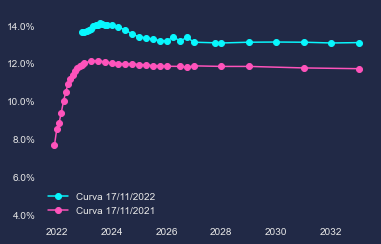

In [123]:
#Plotting the interest Curve chart

fig, ax = plt.subplots()


plt.style.use("cyberpunk")

ax.set_ylim(3.5, 15)
ax.plot(dados_di_recente_tratado.index, dados_di_recente_tratado.values, 
                                    label = f"Curva {data_final}", marker='o')
ax.plot(dados_di_antigo_tratado.index, dados_di_antigo_tratado.values, 
        label = f"Curva {data_inicial}", marker='o')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
ax.grid(False)
plt.savefig('juros.png', dpi = 300)

plt.show()

# Brazilian central bank data (Selic[interest], Inflation and Dollar)

https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
<br>
https://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=json

## Selic

In [124]:
#choosing the start date of selic

selic = sgs.get({'selic':432}, start = '2010-01-01')

selic

,selic
Date,
2010-01-01,8.75
2010-01-02,8.75
2010-01-03,8.75
2010-01-04,8.75
2010-01-05,8.75
...,...
2022-11-14,13.75
2022-11-15,13.75
2022-11-16,13.75


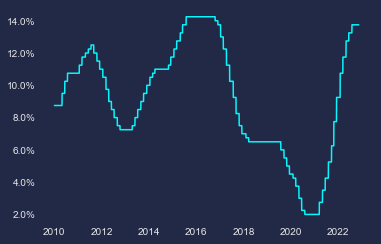

In [125]:
#plotting the selic chart

fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(selic.index, selic['selic'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(False)
plt.savefig('selic.png', dpi = 300)

plt.show()

## Inflation indicators: IPCA and IGP-M

In [126]:
# choosing and setting inflation indicators: IPCA and IGP-M
inflacao = sgs.get({'ipca': 433,
             'igp-m': 189}, start = um_ano_atras + timedelta(180))

inflacao

,ipca,igp-m
Date,,
2022-05-01,0.47,0.52
2022-06-01,0.67,0.59
2022-07-01,-0.68,0.21
2022-08-01,-0.36,-0.70
2022-09-01,-0.29,-0.95
2022-10-01,0.59,-0.97


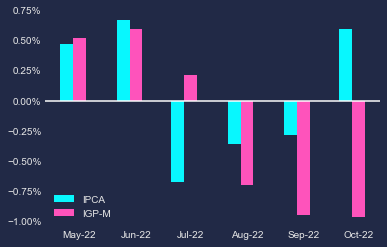

In [127]:
#plotting inflation chart: IPCA x IGP-M

datas_numericas = date2num(inflacao.index)

fig, ax = plt.subplots()

ax.bar(datas_numericas-7, inflacao['ipca'], label = "IPCA", width=7)
ax.bar(datas_numericas, inflacao['igp-m'], label = "IGP-M", width=7)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')
ax.xaxis.set_major_formatter(formato_data)
ax.grid(False)
plt.axhline(y=0, color = 'w')
plt.legend()
plt.savefig('inflacao.png', dpi = 300)

plt.show()

## Dollar

In [128]:
#defining dollar date 

dolar = currency.get('USD', start=um_ano_atras, end=datetime.now())
dolar

,USD
Date,
2021-11-17,5.4993
2021-11-18,5.5470
2021-11-19,5.5584
2021-11-22,5.5841
2021-11-23,5.6456
...,...
2022-11-11,5.3051
2022-11-14,5.3013
2022-11-16,5.3204


In [129]:
dolar_mensal = dolar.resample("M").last()
dolar_anual = dolar.resample("Y").last()

In [130]:
#calculating dollar returns

dolar_diario = dolar.pct_change().dropna()
fechamento_de_dia_dolar = dolar_diario.iloc[-1, :]

display(fechamento_de_dia_dolar)

retorno_mes_a_mes_dolar = dolar_mensal.pct_change().dropna()
retorno_mes_a_mes_dolar = retorno_mes_a_mes_dolar.iloc[1: , :]

display(retorno_mes_a_mes_dolar)

retorno_no_ano_dolar = dolar_anual.pct_change().dropna()

display(retorno_no_ano_dolar)

USD   -0.021553
Name: 2022-11-18 00:00:00, dtype: float64

,USD
Date,
2022-01-31,-0.039978
2022-02-28,-0.040691
2022-03-31,-0.078141
2022-04-30,0.038267
2022-05-31,-0.038666
2022-06-30,0.107657
2022-07-31,-0.009469
2022-08-31,-0.001812
2022-09-30,0.043947


,USD
Date,
2022-12-31,-0.041717


In [131]:
#calculating dollar volatility

volatilidade_12m_dolar = dolar_diario['USD'].std() * np.sqrt(252)

volatilidade_12m_dolar

0.15629784389923848

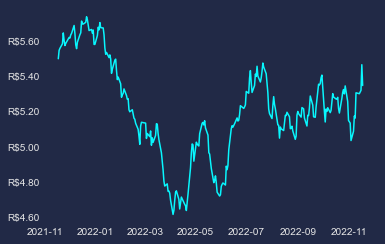

In [132]:
#plotting dollar chart

fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(dolar.index, dolar['USD'])
ax.yaxis.set_major_formatter('R${x:1.2f}')
ax.grid(False)
plt.savefig('dolar.png', dpi = 300)

plt.show()

## Adjusting month index

In [133]:
#defining months

meses = []

for indice in retorno_mes_a_mes.index:

    mes = indice.strftime("%b")
    
    meses.append(mes)
    
meses

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']

# Creating PDF file

In [134]:
class PDF(FPDF):
    
    def header(self):
        
        self.image('logo.png', 6, 6, 20)
        self.set_font('Arial', 'B', 20)
        self.ln(15)
        self.set_draw_color(189, 154, 119) #cor RGB
        self.cell(15, ln = False)
        self.cell(150, 15, f"Relatório Financeiro {data_final}", 
                  border = True, ln = True, align = "C")
        self.ln(5)
        
    def footer(self):
        
        self.set_y(-15) #space to the end of the sheet
        self.set_font('Arial', 'I', 10)
        self.cell(0, 10, f"{self.page_no()}/{{nb}}", align = "C")

In [135]:
#defining basic configurations for PDF file

pdf = PDF("P", "mm", "Letter")
pdf.set_auto_page_break(auto = True, margin = 15)
pdf.alias_nb_pages()
pdf.add_page()
pdf.set_fill_color(255, 255, 255)
pdf.set_draw_color(189, 154, 119)

In [136]:
#putting image and writing the subtitles
pdf.image('financial.png', x = 115, y = 70, w = 75, h = 33)
pdf.set_font('Arial', 'B', 18)
pdf.cell(0, 10, "1 - Ações e câmbio", ln = True,  border = False, fill = False)
pdf.ln(2)

pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "1.1 Fechamento do mercado", ln = True,  border = False, fill = True)

pdf.ln(7)


In [137]:
#putting ibovespa data in PDF file
pdf.set_font('Arial', '', 13)
pdf.cell(25, 15, " Ibovespa", ln = False,  border = True, fill = True)
pdf.cell(20, 15, f" {str(round(fechamento_de_dia[0] * 100, 2))}%", ln = True, 
         border = True, fill = False)

#putting S&P500 data in PDF file 
pdf.cell(25, 15, " S&P500", ln = False,  border = True, fill = True)
pdf.cell(20, 15, f" {str(round(fechamento_de_dia[1] * 100, 2))}%", ln = True,  border = True, fill = False)

#putting Dollar data in PDF file 
pdf.cell(25, 15, " Dólar", ln = False,  border = True, fill = True)
pdf.cell(20, 15, f" {str(round(fechamento_de_dia_dolar[0] * 100, 2))}%", ln = True,  border = True, fill = False)

pdf.ln(7)

In [138]:
#putting images
pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "   1.2 Gráficos Ibovespa, S&P500 e Dólar", ln = True,  border = False, fill = False)

pdf.cell(95, 15, "Ibovespa", ln = False,  border = False, fill = False, align = "C")
pdf.cell(100, 15, "S&P500", ln = True,  border = False, fill = False, align = "C")
pdf.image("ibov.png", w = 80, h = 70, x = 20, y = 160)
pdf.image("sp.png", w = 80, h = 70, x = 115, y = 160)

pdf.ln(130)

pdf.cell(0, 15, "Dólar", ln = True,  border = False, fill = False, align = "C")
pdf.image("dolar.png", w = 100, h = 75, x = 58)


pdf.ln(2)

In [139]:
pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "   1.3 Rentabilidade mês a mês", ln = True,  border = False, fill = False)


#writing months
pdf.cell(17, 10, "", ln = False,  border = False, fill = True, align = "C")

for mes in meses:
    
    pdf.cell(16, 10, mes, ln = False,  border = True, fill = True, align = "C")


pdf.ln(10)

In [140]:
#writing ibov

pdf.cell(17, 10, "Ibov", ln = False,  border = True, fill = True, align = "C")

pdf.set_font('Arial', '', 12)
for rent in retorno_mes_a_mes['Ibov']:
    
    pdf.cell(16, 10, f" {str(round(rent * 100, 2))}%", ln = False,  border = True, align = "C")

pdf.ln(10)

#writing S&P

pdf.cell(17, 10, "S&P500", ln = False,  border = True, fill = True, align = "C")

pdf.set_font('Arial', '', 12)
for rent in retorno_mes_a_mes['S&P500']:
    
    pdf.cell(16, 10, f" {str(round(rent * 100, 2))}%", ln = False,  border = True, align = "C")

pdf.ln(10)

#writing Dollar

pdf.cell(17, 10, "Dólar", ln = False,  border = True, fill = True, align = "C")

pdf.set_font('Arial', '', 12)
for rent in retorno_mes_a_mes_dolar['USD']:
    
    pdf.cell(16, 10, f" {str(round(rent * 100, 2))}%", ln = False,  border = True, align = "C")

pdf.ln(10)

In [141]:
#anual returns
pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "   1.4 Rentabilidade no ano", ln = True,  border = False, fill = False)

#anual ibov returns 
pdf.set_font('Arial', '', 13)
pdf.cell(25, 10, "Ibovespa", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(retorno_no_ano.iloc[0, 0] * 100, 2))}%", ln = True,  border = True, align = "C")

#anual S&P returns
pdf.cell(25, 10, "S&P500", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(retorno_no_ano.iloc[0, 1] * 100, 2))}%", ln = True,  border = True, align = "C")

#anual dollar returns
pdf.cell(25, 10, "Dólar", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(retorno_no_ano_dolar.iloc[0, 0] * 100, 2))}%", ln = True,  border = True, align = "C")


pdf.ln(20)

In [142]:
#volatility
pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "   1.5 Volatilidade 12M", ln = True,  border = False, fill = False)

#ibov volatility
pdf.set_font('Arial', '', 13)
pdf.cell(25, 10, "Ibovespa", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(volatilidade_12m_ibov * 100, 2))}%", ln = True,  border = True, align = "C")

#s&p500 volatility
pdf.cell(25, 10, "S&P500", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(volatilidade_12m_sp * 100, 2))}%", ln = True,  border = True, align = "C")

#dollar volatility
pdf.cell(25, 10, "Dólar", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(volatilidade_12m_dolar * 100, 2))}%", ln = True,  border = True, align = "C")

pdf.image('dollar.png', x = 115, y = 45, w = 70, h = 70, type = '', link = '')

pdf.ln(7)

In [143]:
pdf.set_font('Arial', 'B', 18)
pdf.cell(0, 15, "2 - Dados econômicos", ln = True,  border = False, fill = False)

pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "2.1 Curva de juros", ln = True,  border = False, fill = False)
pdf.image("juros.png", w = 125, h = 100, x = 40, y = 140)

pdf.ln(135)

pdf.cell(0, 15, "2.2 Inflação", ln = True,  border = False, fill = False)
pdf.image("inflacao.png", w = 110, h = 90, x = 40)


pdf.cell(0, 15, "2.3 Selic", ln = True,  border = False, fill = False)
pdf.image("selic.png", w = 110, h = 90, x = 40)

pdf.output('financial_report.pdf')

''

# Sending e-mail from outlook

In [144]:
#to make connection with outlook
#!pip install pywin32

In [145]:
import win32com.client as win32

In [146]:
#integration with your outlook
outlook = win32.Dispatch('outlook.application')

In [147]:
#creating an e-mail
email = outlook.CreateItem(0)

In [148]:
#choose which emails to send, the subject and e-mail body
email.To = "example@domain.com"
email.Subject = "Daily Financial Report"
email.Body = '''Dear Mr X,

Attached is your updated daily financial report.

Att,

Your signature

'''

#choose the directory where the file is located
anexo = r"C:/Users/yourpc/Documents/financial_report.pdf"

email.Attachments.Add(anexo)

email.Send()